## Libraries

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import VarianceThreshold
from matplotlib import colors

## Loading Data

In [73]:
df = pd.read_excel('SWaT_Dataset_Attack_v0.xlsx', skiprows=[0])
df

,Timestamp,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,...,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603,Normal/Attack
0,28/12/2015 10:00:00 AM,2.427057,522.8467,2,2,1,262.0161,8.396437,328.6337,2.445391,...,2,1,250.8652,1.649953,189.5988,0.000128,1,1,1,Normal
1,28/12/2015 10:00:01 AM,2.446274,522.8860,2,2,1,262.0161,8.396437,328.6337,2.445391,...,2,1,250.8652,1.649953,189.6789,0.000128,1,1,1,Normal
2,28/12/2015 10:00:02 AM,2.489191,522.8467,2,2,1,262.0161,8.394514,328.6337,2.442316,...,2,1,250.8812,1.649953,189.6789,0.000128,1,1,1,Normal
3,28/12/2015 10:00:03 AM,2.534350,522.9645,2,2,1,262.0161,8.394514,328.6337,2.442316,...,2,1,250.8812,1.649953,189.6148,0.000128,1,1,1,Normal
4,28/12/2015 10:00:04 AM,2.569260,523.4748,2,2,1,262.0161,8.394514,328.6337,2.443085,...,2,1,250.8812,1.649953,189.5027,0.000128,1,1,1,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449914,2/1/2016 2:59:55 PM,2.559972,519.5495,2,2,1,168.0979,8.638683,301.9226,2.459488,...,2,1,251.1535,0.865024,189.0220,0.000000,1,1,1,Normal
449915,2/1/2016 2:59:56 PM,2.549082,520.4131,2,2,1,168.0979,8.638683,301.9226,2.459488,...,2,1,251.0734,0.865024,188.9259,0.000000,1,1,1,Normal
449916,2/1/2016 2:59:57 PM,2.531467,520.6878,2,2,1,168.0979,8.638683,301.9226,2.460129,...,2,1,251.0734,0.865024,188.9259,0.000000,1,1,1,Normal
449917,2/1/2016 2:59:58 PM,2.521218,520.7271,2,2,1,168.0979,8.638683,301.9226,2.460129,...,2,1,251.0734,0.865024,188.9259,0.000000,1,1,1,Normal


In [74]:
df.shape

(449919, 53)

## Feature Engineering and Selection

### Fixing class labels

In [75]:
print("Total target classes:")
print("----------------------")
print(df["Normal/Attack"].value_counts()) 

Total target classes:
----------------------
Normal     395298
Attack      54584
A ttack        37
Name: Normal/Attack, dtype: int64


In [76]:
df['Normal/Attack'].mask(df['Normal/Attack'] == 'A ttack', 'Attack', inplace=True)

In [77]:
print("Total target classes:")
print("----------------------")
print(df["Normal/Attack"].value_counts()) 

Total target classes:
----------------------
Normal    395298
Attack     54621
Name: Normal/Attack, dtype: int64


### Variance-Threshold Test for numerical variables

In [78]:
#numerical variables
numerical = df.select_dtypes( ['int64','float64']).columns
numerical

Index(['FIT101', 'LIT101', ' MV101', 'P101', 'P102', ' AIT201', 'AIT202',
       'AIT203', 'FIT201', ' MV201', ' P201', ' P202', 'P203', ' P204', 'P205',
       'P206', 'DPIT301', 'FIT301', 'LIT301', 'MV301', 'MV302', ' MV303',
       'MV304', 'P301', 'P302', 'AIT401', 'AIT402', 'FIT401', 'LIT401', 'P401',
       'P402', 'P403', 'P404', 'UV401', 'AIT501', 'AIT502', 'AIT503', 'AIT504',
       'FIT501', 'FIT502', 'FIT503', 'FIT504', 'P501', 'P502', 'PIT501',
       'PIT502', 'PIT503', 'FIT601', 'P601', 'P602', 'P603'],
      dtype='object')

In [79]:
df[numerical]

,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,MV201,...,FIT504,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603
0,2.427057,522.8467,2,2,1,262.0161,8.396437,328.6337,2.445391,2,...,0.307786,2,1,250.8652,1.649953,189.5988,0.000128,1,1,1
1,2.446274,522.8860,2,2,1,262.0161,8.396437,328.6337,2.445391,2,...,0.307786,2,1,250.8652,1.649953,189.6789,0.000128,1,1,1
2,2.489191,522.8467,2,2,1,262.0161,8.394514,328.6337,2.442316,2,...,0.308619,2,1,250.8812,1.649953,189.6789,0.000128,1,1,1
3,2.534350,522.9645,2,2,1,262.0161,8.394514,328.6337,2.442316,2,...,0.308619,2,1,250.8812,1.649953,189.6148,0.000128,1,1,1
4,2.569260,523.4748,2,2,1,262.0161,8.394514,328.6337,2.443085,2,...,0.308619,2,1,250.8812,1.649953,189.5027,0.000128,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449914,2.559972,519.5495,2,2,1,168.0979,8.638683,301.9226,2.459488,2,...,0.306569,2,1,251.1535,0.865024,189.0220,0.000000,1,1,1
449915,2.549082,520.4131,2,2,1,168.0979,8.638683,301.9226,2.459488,2,...,0.306569,2,1,251.0734,0.865024,188.9259,0.000000,1,1,1
449916,2.531467,520.6878,2,2,1,168.0979,8.638683,301.9226,2.460129,2,...,0.306569,2,1,251.0734,0.865024,188.9259,0.000000,1,1,1
449917,2.521218,520.7271,2,2,1,168.0979,8.638683,301.9226,2.460129,2,...,0.307978,2,1,251.0734,0.865024,188.9259,0.000000,1,1,1


In [80]:
var_thr = VarianceThreshold(threshold = 0.2) #Removing features that are at least 80% constant
var_thr.fit(df[numerical])

var_thr.get_support()

#True: Low Variance 
#False: High Variance

array([ True,  True,  True,  True, False,  True, False,  True,  True,
        True, False, False,  True, False,  True, False,  True,  True,
        True, False,  True, False, False, False, False, False,  True,
        True,  True, False, False, False, False, False, False,  True,
        True,  True, False, False, False, False, False, False,  True,
       False,  True, False, False, False, False])

In [81]:
cons_cols = [column for column in df[numerical].columns 
          if column not in df[numerical].columns[var_thr.get_support()]]

In [82]:
for features in cons_cols:
    print(features)

P102
AIT202
 P201
 P202
 P204
P206
MV301
 MV303
MV304
P301
P302
AIT401
P401
P402
P403
P404
UV401
AIT501
FIT501
FIT502
FIT503
FIT504
P501
P502
PIT502
FIT601
P601
P602
P603


In [83]:
df = df.drop(cons_cols,axis=1)

In [84]:
df

,Timestamp,FIT101,LIT101,MV101,P101,AIT201,AIT203,FIT201,MV201,P203,...,MV302,AIT402,FIT401,LIT401,AIT502,AIT503,AIT504,PIT501,PIT503,Normal/Attack
0,28/12/2015 10:00:00 AM,2.427057,522.8467,2,2,262.0161,328.6337,2.445391,2,2,...,2,156.0882,1.713517,942.0662,145.1166,264.5475,12.03538,250.8652,189.5988,Normal
1,28/12/2015 10:00:01 AM,2.446274,522.8860,2,2,262.0161,328.6337,2.445391,2,2,...,2,156.0882,1.715952,942.0277,145.1166,264.5475,12.03538,250.8652,189.6789,Normal
2,28/12/2015 10:00:02 AM,2.489191,522.8467,2,2,262.0161,328.6337,2.442316,2,2,...,2,156.0882,1.715952,941.8739,145.1166,264.5475,12.03538,250.8812,189.6789,Normal
3,28/12/2015 10:00:03 AM,2.534350,522.9645,2,2,262.0161,328.6337,2.442316,2,2,...,2,156.0882,1.714670,941.7970,145.0141,264.5475,12.03538,250.8812,189.6148,Normal
4,28/12/2015 10:00:04 AM,2.569260,523.4748,2,2,262.0161,328.6337,2.443085,2,2,...,2,156.0882,1.714670,942.2200,144.8859,264.5475,12.03538,250.8812,189.5027,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449914,2/1/2016 2:59:55 PM,2.559972,519.5495,2,2,168.0979,301.9226,2.459488,2,2,...,2,145.6037,1.705315,956.8701,139.1182,257.1136,14.80390,251.1535,189.0220,Normal
449915,2/1/2016 2:59:56 PM,2.549082,520.4131,2,2,168.0979,301.9226,2.459488,2,2,...,2,145.6037,1.705315,957.1777,139.1182,257.1136,14.80390,251.0734,188.9259,Normal
449916,2/1/2016 2:59:57 PM,2.531467,520.6878,2,2,168.0979,301.9226,2.460129,2,2,...,2,145.5524,1.706212,957.2930,139.1182,257.1136,14.80390,251.0734,188.9259,Normal
449917,2/1/2016 2:59:58 PM,2.521218,520.7271,2,2,168.0979,301.9226,2.460129,2,2,...,2,145.5524,1.706212,957.6775,139.1182,257.1136,14.80390,251.0734,188.9259,Normal


### Correlation matrix for numerical variables

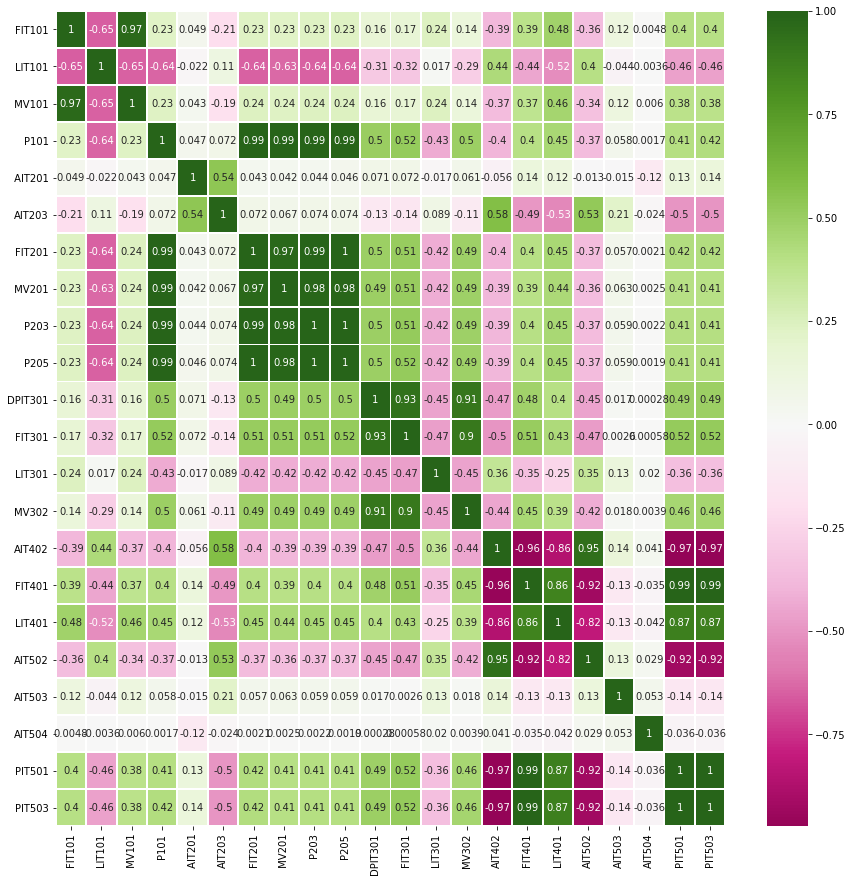

In [85]:
corrmat= df.corr()
plt.figure(figsize=(15,15))  
sns.heatmap(corrmat,annot=True, cmap="PiYG", center=0,linewidths=.9)